- 카테고리 예측에 특화:
- 결측치에 효과적 대응으로 모델 성능 개선
- Library set이 비교적 간단하고 직관적인 API
- Computational resource를 많이 사용하여 대규모 데이터
셋트에는 부적합
- Text, NLP 등에는 부적합

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the CatBoostClassifier
modelc = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    verbose=0  # <--- 훈련 로그 생략
)

# Fit the model on the training data
modelc.fit(X_train, y_train)

# Evaluate the model on the test data
print("Accuracy: {:.2f}".format(modelc.score(X_test, y_test)))


Accuracy: 0.97


In [2]:
from sklearn.metrics import classification_report

# 예측
y_pred = modelc.predict(X_test)

# 분류 성능 보고서 출력
cr = classification_report(y_test, y_pred)
print(cr)


              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



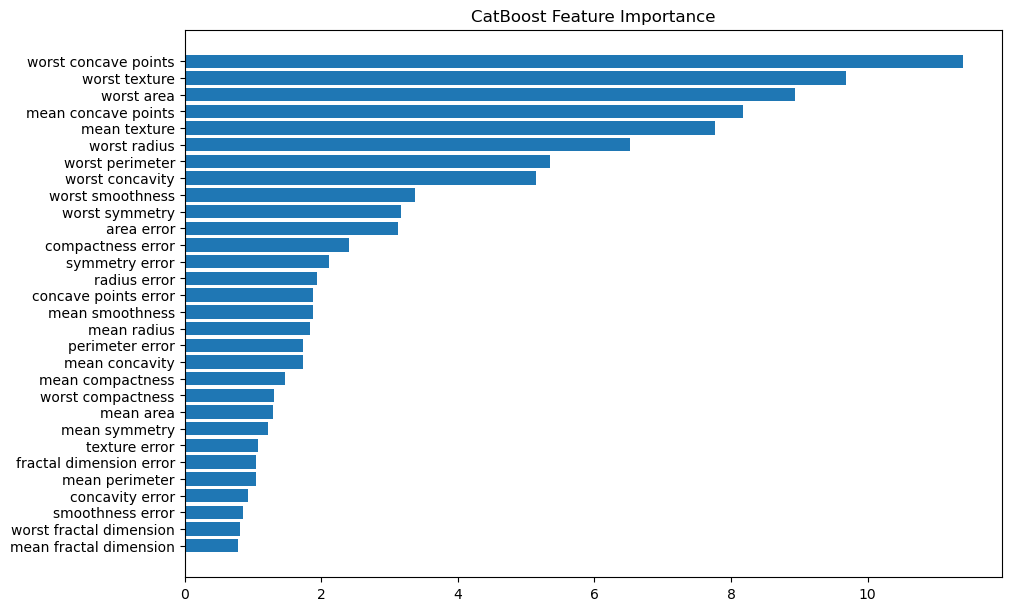

In [3]:
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load data
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Pool and model
train_pool = Pool(data=X_train, label=y_train)
model = CatBoostClassifier(verbose=0)
model.fit(train_pool)

# Get feature importance
feature_importance = model.get_feature_importance(train_pool)

# Sort features by importance (descending)
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# Plot
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)
ax.barh(range(len(sorted_feature_importance)), sorted_feature_importance)
ax.set_yticks(range(len(sorted_feature_names)))
ax.set_yticklabels(sorted_feature_names)
ax.invert_yaxis()  # 중요도 높은 항목이 위로
ax.set_title("CatBoost Feature Importance")
plt.show()
